# Environment Setup

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "../data/Pokemon (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


# A Basic Data Dictionary

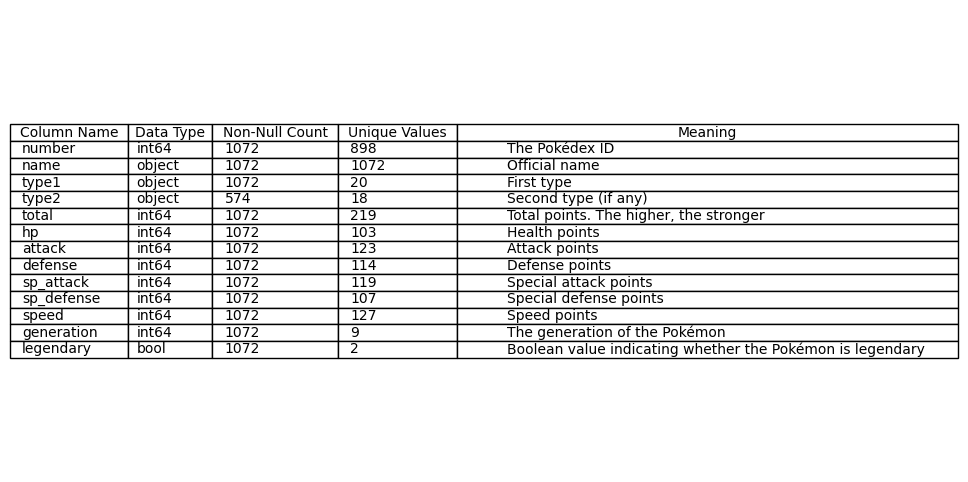

In [4]:
# Create Data Dictionary
data_dict = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Non-Null Count": df.notnull().sum().values,
    "Unique Values": df.nunique().values,
    "Meaning": [
        "The Pokédex ID",                # Number
        "Official name",                  # Name
        "First type",                      # Type 1
        "Second type (if any)",            # Type 2
        "Total points. The higher, the stronger", # Total
        "Health points",                   # HP
        "Attack points",                    # Attack
        "Defense points",                   # Defense
        "Special attack points",            # Sp_Attack
        "Special defense points",           # Sp_Defense
        "Speed points",                     # Speed
        "The generation of the Pokémon",    # Generation
        "Boolean value indicating whether the Pokémon is legendary" # Legendary
    ]
})

# Display Data Dictionary with larger font size
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Create table with larger font size
table = ax.table(cellText=data_dict.values, colLabels=data_dict.columns, cellLoc='left', loc='center')

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)  # Increase font size

# Adjust column widths for better readability
table.auto_set_column_width([0, 1, 2, 3, 4])

# Show the table
plt.show()

# Summary Statistics

In [6]:
# Get dataset information
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Summary statistics (rounded to 2 decimal places)
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB
Missing values per column:
 number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
genera

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.00,1072.00,1072.00,1072.00,1072.00,1072.00,1072.00,1072.00,1072.00
mean,445.22,440.89,70.49,80.94,74.97,73.27,72.48,68.79,4.29
std,267.77,121.38,26.87,32.46,31.21,32.64,27.93,30.08,2.35
min,1.00,175.00,1.00,5.00,5.00,10.00,20.00,5.00,0.00
25%,209.75,330.00,50.00,56.00,52.00,50.00,50.00,45.00,2.00
50%,442.50,460.50,68.00,80.00,70.00,65.00,70.00,65.00,4.00
75%,681.25,519.25,84.00,100.00,90.00,95.00,90.00,90.00,6.00
max,898.00,1125.00,255.00,190.00,250.00,194.00,250.00,200.00,8.00


# Data Cleaning for Duplication

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# If needed, drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


# Data Visualization

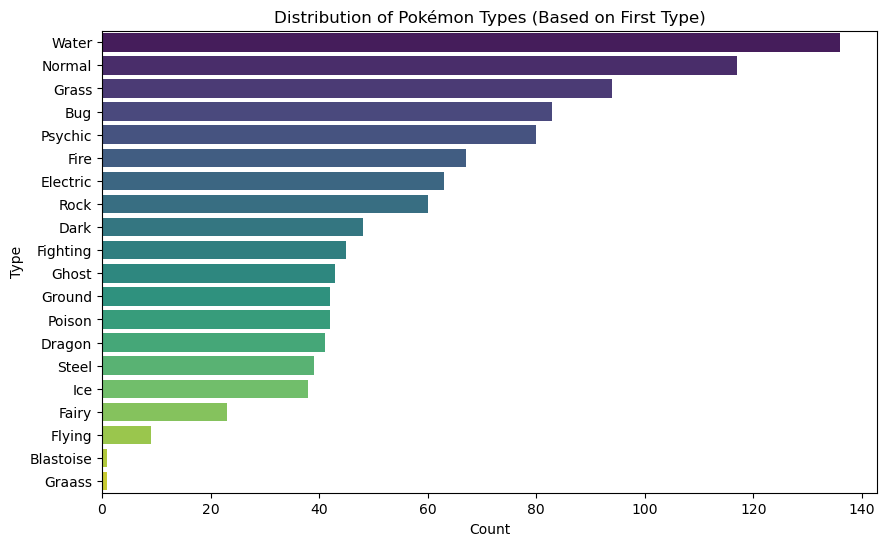

In [10]:
# Create a bar chart to show the distribution number of each pokémon types
plt.figure(figsize=(10, 6))
sns.countplot(y=df["type1"], order=df["type1"].value_counts().index, palette="viridis")
plt.title("Distribution of Pokémon Types (Based on First Type)")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

### Bar Chart Discussion
- Water type Pokémons are the most abundant, as water is a fundamental element in Pokémon lore (oceans, rivers).
- Normal type Pokémons are the second most abundant, as they are often seen as common, early-game species.
- Some Pokémon belong to two types, which might skew certain type counts. For example, Flying is often a secondary type (e.g., Normal/Flying, Dragon/Flying), leading to a higher actual count.
- Many Legendary Pokémon belong to rarer types such as Dragon, Psychic, or Steel. This suggests that rarer types are often associated with stronger, more unique Pokémon.
- Both "Blastoise" and "Graass" are errors in the dataset, where these records should belong to "water" and "grass" respectively. Correcting such errors involve going to the source file and making corrective edits. I intentionally left them here to indicate the errors.

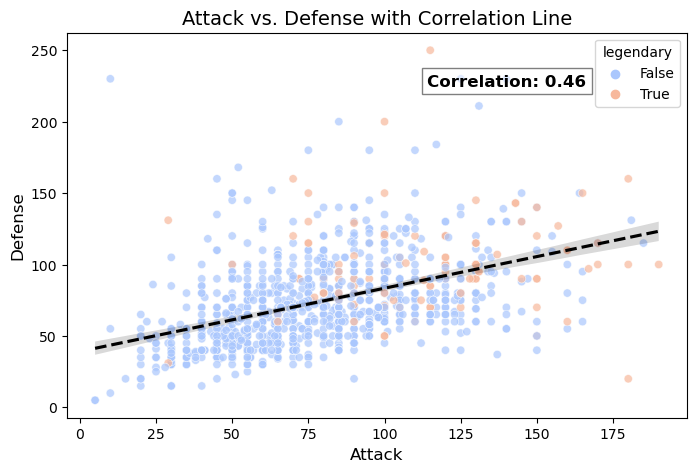

In [12]:
import numpy as np

# Create a scatterplot to examine relationship between attack and defense
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["attack"], y=df["defense"], hue=df["legendary"], palette="coolwarm", alpha=0.7)

# Compute correlation coefficient
correlation = np.corrcoef(df["attack"], df["defense"])[0, 1]

# Fit a linear regression line
sns.regplot(x=df["attack"], y=df["defense"], scatter=False, color="black", line_kws={"linestyle": "dashed"})

# Add correlation annotation
plt.text(df["attack"].max() * 0.6, df["defense"].max() * 0.9, f"Correlation: {correlation:.2f}",
         fontsize=12, color="black", fontweight="bold", bbox=dict(facecolor='white', alpha=0.5))

# Titles and labels
plt.title("Attack vs. Defense with Correlation Line", fontsize=14)
plt.xlabel("Attack", fontsize=12)
plt.ylabel("Defense", fontsize=12)

# Show plot
plt.show()

### Scatterplot Discussion
- There is a moderate-weak correlation between attack and defense. (Coefficient is larger than 0.4 but smaller than 0.7)
- A positive correlation means that Pokémon with higher Attack stats tend to have higher Defense
- There are quite a number of extreme value combinations.
- Generally, given the same defense figures, legendary Pokémons tend to have higher attack points; Likewise, given the same attack figures, legendary Pokémons tend to have higher defense points.

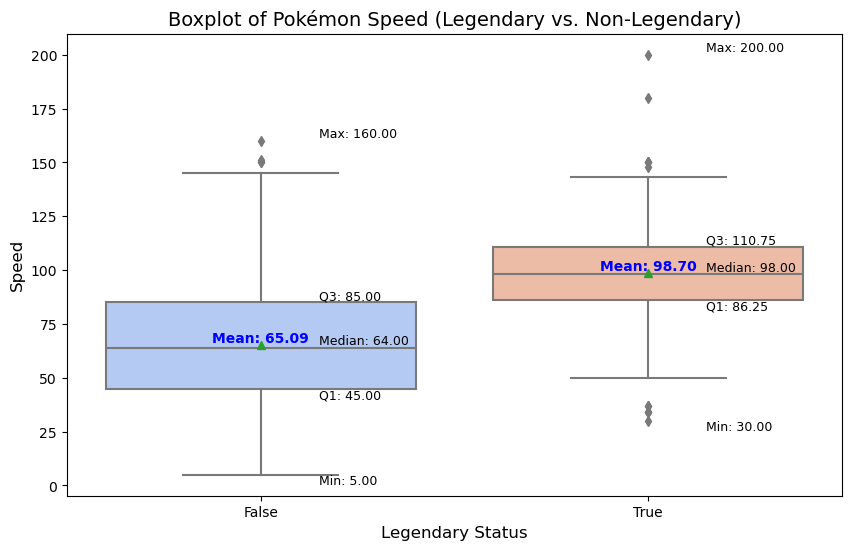

In [14]:
# Create a boxplot of the speed points between legendary and non-legnedary Pokémons
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x="legendary", y="speed", data=df, palette="coolwarm", showmeans=True)

# Annotate boxplot with statistics
def add_values_to_boxplot_aligned(boxplot, data, x_col, y_col):
    unique_values = data[x_col].unique()
    for i, category in enumerate(unique_values):
        stats = data[data[x_col] == category][y_col].describe()

        # Extract key statistics
        mean = stats["mean"]
        median = stats["50%"]
        q1 = stats["25%"]
        q3 = stats["75%"]
        min_val = stats["min"]
        max_val = stats["max"]

        # Add mean centered
        plt.text(i, mean, f'Mean: {mean:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue', fontweight='bold')

        # Align all other stats to the right
        plt.text(i + 0.15, median, f'Median: {median:.2f}', horizontalalignment='left', verticalalignment='bottom', fontsize=9, color='black')
        plt.text(i + 0.15, q1, f'Q1: {q1:.2f}', horizontalalignment='left', verticalalignment='top', fontsize=9, color='black')
        plt.text(i + 0.15, q3, f'Q3: {q3:.2f}', horizontalalignment='left', verticalalignment='bottom', fontsize=9, color='black')
        plt.text(i + 0.15, min_val, f'Min: {min_val:.2f}', horizontalalignment='left', verticalalignment='top', fontsize=9, color='black')
        plt.text(i + 0.15, max_val, f'Max: {max_val:.2f}', horizontalalignment='left', verticalalignment='bottom', fontsize=9, color='black')

# Apply annotation function
add_values_to_boxplot_aligned(boxplot, df, "legendary", "speed")

# Titles and labels
plt.title("Boxplot of Pokémon Speed (Legendary vs. Non-Legendary)", fontsize=14)
plt.xlabel("Legendary Status", fontsize=12)
plt.ylabel("Speed", fontsize=12)

# Show plot
plt.show()

### Boxplot Discussion
- It is clear that legendary Pokémons outperform the non-legendary ones in speed, as illustrated in the comparison of both median and mean.
- The variation in non-legendary Pokémons is much greater, as illustrated by its larger Interquartile Range (IQR).
- There are outliers in both categories.
- In both categories, the median is very close to the median, suggesting a relatively balanced distribution.

# Reflection Questions and Answers

## How do the three file formats (.ipynb, .html, .md) look online?

- .ipynb: Interactive, best for coding and analyzing.
- .html: Retains formatting, best for sharing outside GitHub.
- .md: Simple, but lacks images.

As to which one looks best, I personally like the .ipynb file as it has both the editability and visualizing capability.

## Do you think there are any problems with your dataset?  Explain.

- There was no missing values except for "type2", which are legit as some Pokémons do have just one type
- There was no duplicating records in the dataset, as checked by the above codes
- However, there were two row of data that have an incorrect "type1" as "Blastoise" and "Graass". They were possibly caused by errors in data entry (typo & copying and pasting)
- There may also be bias when we only consider "type1" in some analysis. Some Pokémon types may be more commonly found as type2. Focusing only on type1 may underestimate their presence and influence.

## What Questions do you have about the data?  Is there a problem you would want to solve?  Something to predict?

- Which non-legendary Pokémons are the strongest? (Remark: in some battle environment, legendary Pokémons are banned)
- Among the mega-evolved Pokémons, which one has the biggest improvement in total stats due to its mega evolution? (Remark: mega-evolved Pokémons typically has the word "mega" in front of its original name)
- Predict which stat points is the most influential for Pokémons to be viable in competitive battles?

### Which non-legendary Pokémons are the strongest?

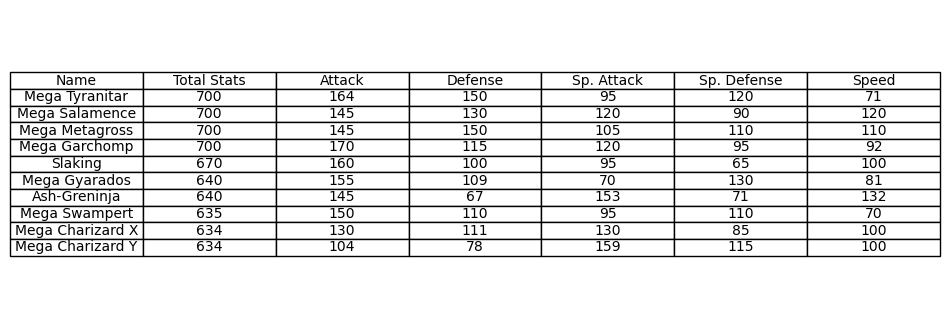

In [24]:
# Identify the Top 10 Strongest Non-Legendary Pokémon Based on Total Stats
top_10_non_legendary = df[df["legendary"] == False].nlargest(10, "total")

# Display the results as a table
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=top_10_non_legendary[['name', 'total', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].values, 
                 colLabels=['Name', 'Total Stats', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed'], 
                 cellLoc='center', loc='center')

# Adjust font size for readability
table.auto_set_font_size(False)
table.set_fontsize(10)

# Show the table
plt.show()

### Answer to the strongest non-legendary Pokémons
- Mega Tyranitar is the strongest non-legendary Pokémon based on total stats
- Slaking is the strongest non-legendary, non-mega-evolved Pokémon based on total stats
- There are still some other important factors affecting the battle strength of a Pokémon apart from the total stats, such as the point distribution and personality of the Pokémons


## Which Pokémon's mega evolution improves its total stats by the most?

In [27]:
# Identify Mega-evolved Pokémon (those with "Mega" in their name)
mega_pokemon = df[df["name"].str.contains("Mega", case=False, na=False)].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Extract original names by removing "Mega "
mega_pokemon.loc[:, "original_name"] = mega_pokemon["name"].str.replace("Mega ", "", regex=False)

# Merge with original Pokémon data to find corresponding base forms
merged = mega_pokemon.merge(df, left_on="original_name", right_on="name", suffixes=("_mega", "_original"))

# Calculate the increase in total stats
merged["total_increase"] = merged["total_mega"] - merged["total_original"]

# Find the Mega Pokémon with the biggest increase in total stats
max_increase_pokemon = merged.loc[merged["total_increase"].idxmax(), ["name_mega", "original_name", "total_original", "total_mega", "total_increase"]]

# Display result
max_increase_pokemon

name_mega         Mega Venusaur
original_name          Venusaur
total_original              525
total_mega                  625
total_increase              100
Name: 0, dtype: object

## Predict which Pokémon's stats affect its competitiveness the most in battles?

Accuracy: 0.958139534883721
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.97      0.80      0.88        40

    accuracy                           0.96       215
   macro avg       0.96      0.90      0.93       215
weighted avg       0.96      0.96      0.96       215



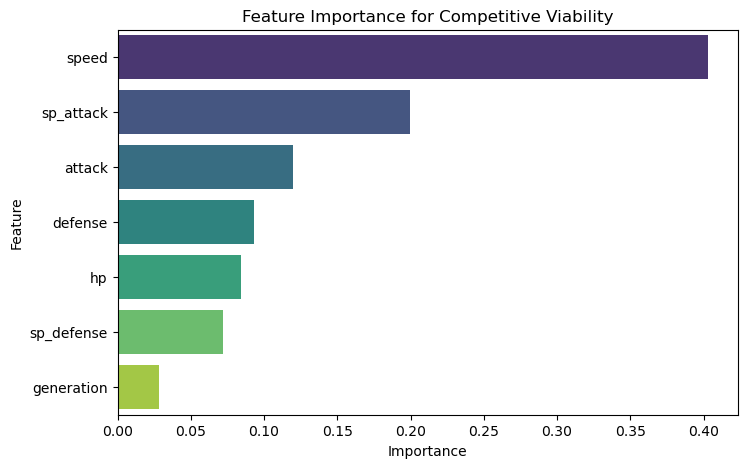

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a binary target column for "Competitive Viability"
df["competitive_viable"] = np.where((df["total"] > 500) & (df["speed"] > 80), 1, 0)

# Features and Target
features = ["attack", "defense", "sp_attack", "sp_defense", "speed", "hp", "generation"]
X = df[features]
y = df["competitive_viable"]

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

# Print Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns

# Feature Importance
feature_importance = pd.DataFrame({"Feature": features, "Importance": clf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance for Competitive Viability")
plt.show()

### Answer to the most influential stats of Pokémons
- According to the actual battle enivronment, I assumed that being "viable" means the Pokémons' total stats is above 500 and their speed stat is at least 80.
- Based on a Random Forest Classifiication model training, speed is identified to be the most important, while generation is almost irrelevant
- The two types of attacks (attack and special attack) are more important than the two types of defense and health points
- Speed dictates which Pokémon got to make the move first, the two types of attack determine whether the battle can be settled in as few moves as possible.


# Reference

- Dalmotra, J. (n.d.). Pokémon dataset [Data set]. Kaggle. Retrieved February 2, 2025, from https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset/data
- Pandas Documentation. (n.d.). Returning a view versus a copy. Retrieved February 2, 2025, from https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. Retrieved from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
- Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. Retrieved from https://seaborn.pydata.org/generated/seaborn.scatterplot.html